# Perturbation Space Norman

In [1]:
import os

os.environ["KMP_WARNINGS"] = "off"
import warnings

warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [5]:
adata = sc.read_h5ad("data/norman_mixscaped.h5ad")

In [6]:
G1_CYCLE = [
    "CDKN1A",
    {"CDKN1B", "CDKN1A"},
    "CDKN1B",
    {"CDKN1C", "CDKN1A"},
    {"CDKN1C", "CDKN1B"},
    "CDKN1C",
]

ERYTHROID = [
    {"CBL", "CNN1"},
    {"CBL", "PTPN12"},
    {"CBL", "PTPN9"},
    {"CBL", "UBASH3B"},
    {"SAMD1", "PTPN12"},
    {"SAMD1", "UBASH3B"},
    {"UBASH3B", "CNN1"},
    {"UBASH3B", "PTPN12"},
    {"UBASH3B", "PTPN9"},
    {"UBASH3B", "UBASH3A"},
    {"UBASH3B", "ZBTB25"},
    {"BPGM", "SAMD1"},
    "PTPN1",
    {"PTPN12", "PTPN9"},
    {"PTPN12", "UBASH3A"},
    {"PTPN12", "ZBTB25"},
    {"UBASH3A", "CNN1"},
]

PIONEER_FACTORS = [
    {"FOXA1", "FOXF1"},
    {"FOXA1", "FOXL2"},
    {"FOXA1", "HOXB9"},
    {"FOXA3", "FOXA1"},
    {"FOXA3", "FOXF1"},
    {"FOXA3", "FOXL2"},
    {"FOXA3", "HOXB9"},
    "FOXA3",
    {"FOXF1", "FOXL2"},
    {"FOXF1", "HOXB9"},
    {"FOXL2", "MEIS1"},
    "HOXA13",
    "HOXC13",
    {"POU3F2", "FOXL2"},
    "TP73",
    "MIDN",
    {"LYL1", "IER5L"},
    "HOXC13",
    {"DUSP9", "SNAI1"},
    {"ZBTB10", "SNAI1"},
]

GRANULOCYTE_APOPTOSIS = [
    "SPI1",
    "CEBPA",
    {"CEBPB", "CEBPA"},
    "CEBPB",
    {"CEBPE", "CEBPA"},
    {"CEBPE", "CEBPB"},
    {"CEBPE", "RUNX1T1"},
    {"CEBPE", "SPI1"},
    "CEBPE",
    {"ETS2", "CEBPE"},
    {"KLF1", "CEBPA"},
    {"FOSB", "CEBPB"},
    {"FOSB", "CEBPE"},
    {"ZC3HAV1", "CEBPA"},
    {"JUN", "CEBPA"},
]

PRO_GROWTH = [
    {"CEBPE", "KLF1"},
    "KLF1",
    {"KLF1", "BAK1"},
    {"KLF1", "MAP2K6"},
    {"KLF1", "TGFBR2"},
    "ELMSAN1",
    {"MAP2K3", "SLC38A2"},
    {"MAP2K3", "ELMSAN1"},
    "MAP2K3",
    {"MAP2K3", "MAP2K6"},
    {"MAP2K6", "ELMSAN1"},
    "MAP2K6",
    {"MAP2K6", "KLF1"},
]

MEGAKARYOCYTE = [
    {"MAPK1", "TGFBR2"},
    "MAPK1",
    {"ETS2", "MAPK1"},
    "ETS2",
    {"CEBPB", "MAPK1"},
]

programmes = {
    "G1 cell cycle": G1_CYCLE,
    "Erythroid": ERYTHROID,
    "Pioneer factors": PIONEER_FACTORS,
    "Granulocyte apoptosis": GRANULOCYTE_APOPTOSIS,
    "Pro-growth": PRO_GROWTH,
    "Megakaryocyte": MEGAKARYOCYTE,
}

In [7]:
gene_programme = []

for target_pert in adata.obs["perturbation_name"]:
    if target_pert == "control":
        gene_programme.append("Control")
        continue

    found_programme = False
    for programme, pert_list in programmes.items():
        for pert in pert_list:
            if (type(pert) == set and pert == set(target_pert.split("+"))) or (
                target_pert == pert
            ):
                gene_programme.append(programme)
                found_programme = True
                break

    if not found_programme:
        gene_programme.append("Unknown")

adata.obs["gene_programme"] = gene_programme
adata.obs["gene_programme"] = adata.obs["gene_programme"].astype("category")

In [8]:
# Only work with annotated gene programmes
adata = adata[adata.obs["gene_programme"] != "Unknown"]

## Generate mixscape cleaned perturbation column

In [9]:
adata.obs["perturbation_name_cleaned"] = adata.obs.apply(
    lambda row: (
        "NP" if row["mixscape_class_global"] == "NP" else row["perturbation_name"]
    ),
    axis=1,
)
adata.obs["perturbation_name_cleaned"] = adata.obs["perturbation_name_cleaned"].astype(
    "category"
)

In [10]:
adata_mixscape_cleaned = adata[adata.obs["perturbation_name_cleaned"] != "NP"]
adata_mixscape_cleaned

View of AnnData object with n_obs × n_vars = 33974 × 4000
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF

## Pseudobulk

In [11]:
ps = pt.tl.PseudobulkSpace()
psadata = ps.compute(
    adata_mixscape_cleaned,
    target_col="perturbation_name",
    groups_col="perturbation_name",
    mode="mean",
    min_cells=0,
    min_counts=0,
)

         Falling back to preprocessing with `sc.pp.pca` and default params.


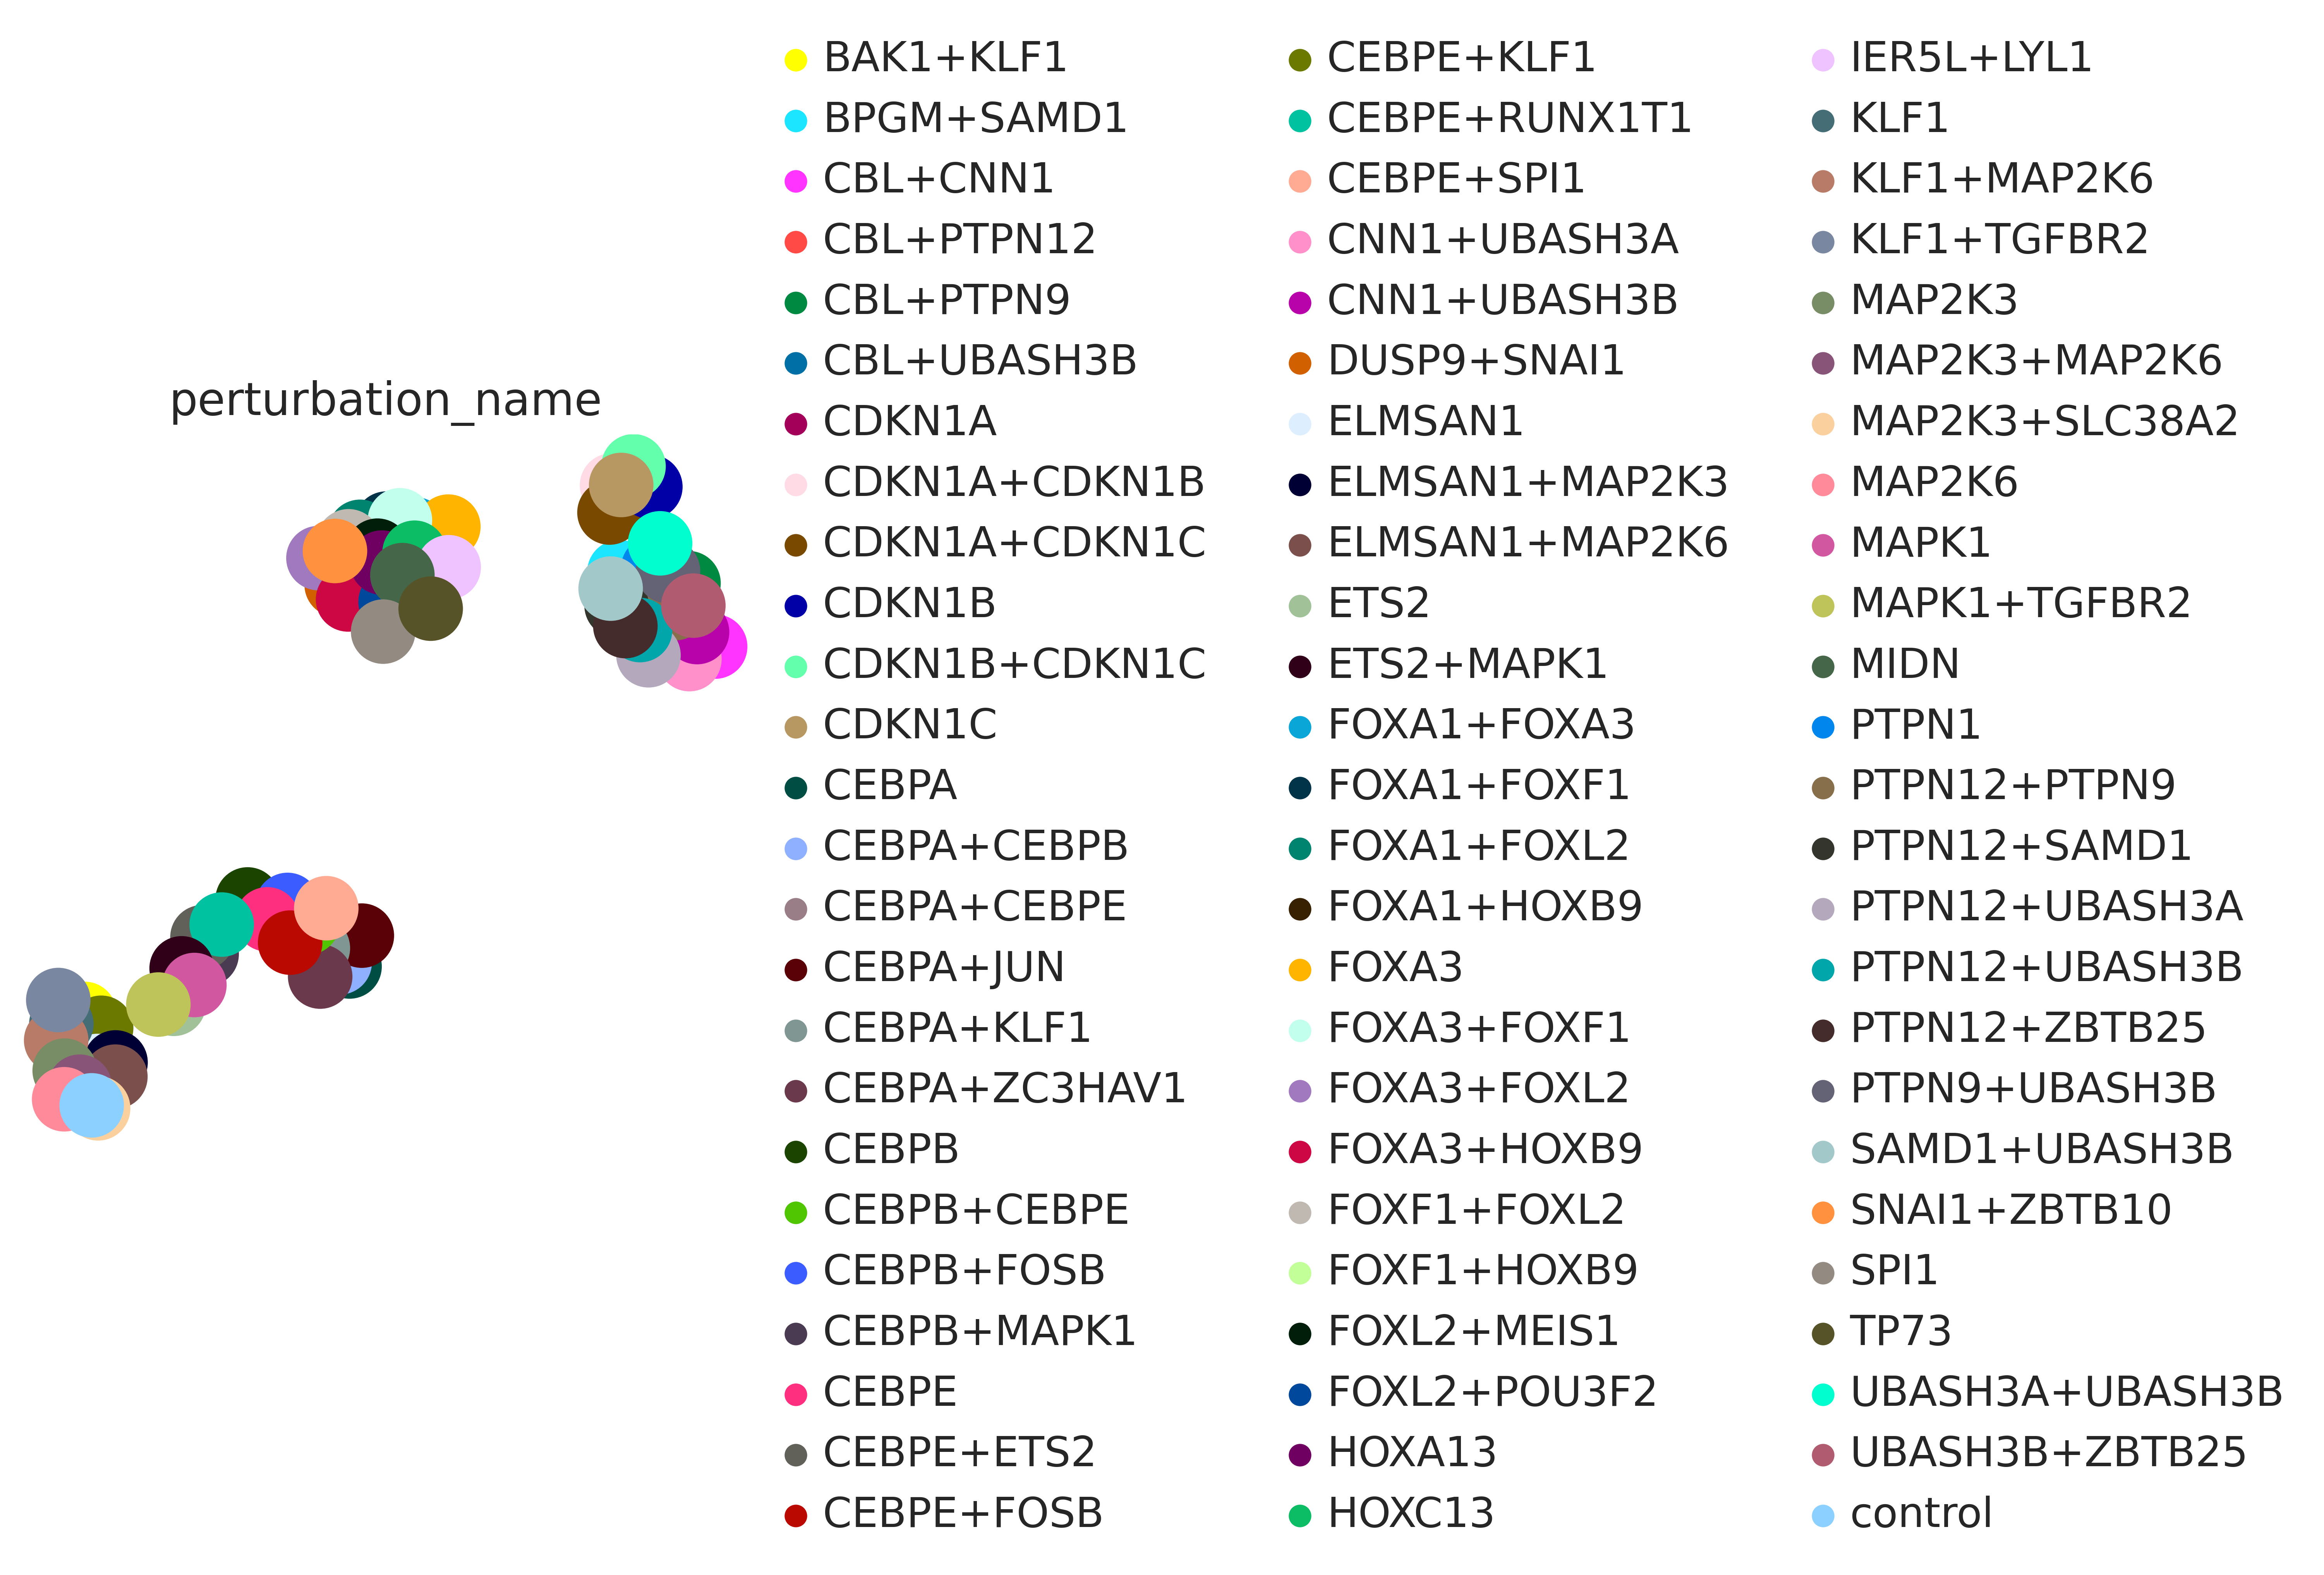

In [12]:
sc.pp.neighbors(psadata)
sc.tl.umap(psadata)
sc.pl.umap(psadata, color="perturbation_name", show=False)
plt.savefig("figures/pseudobulk_perturbation_name_umap.png", bbox_inches="tight")

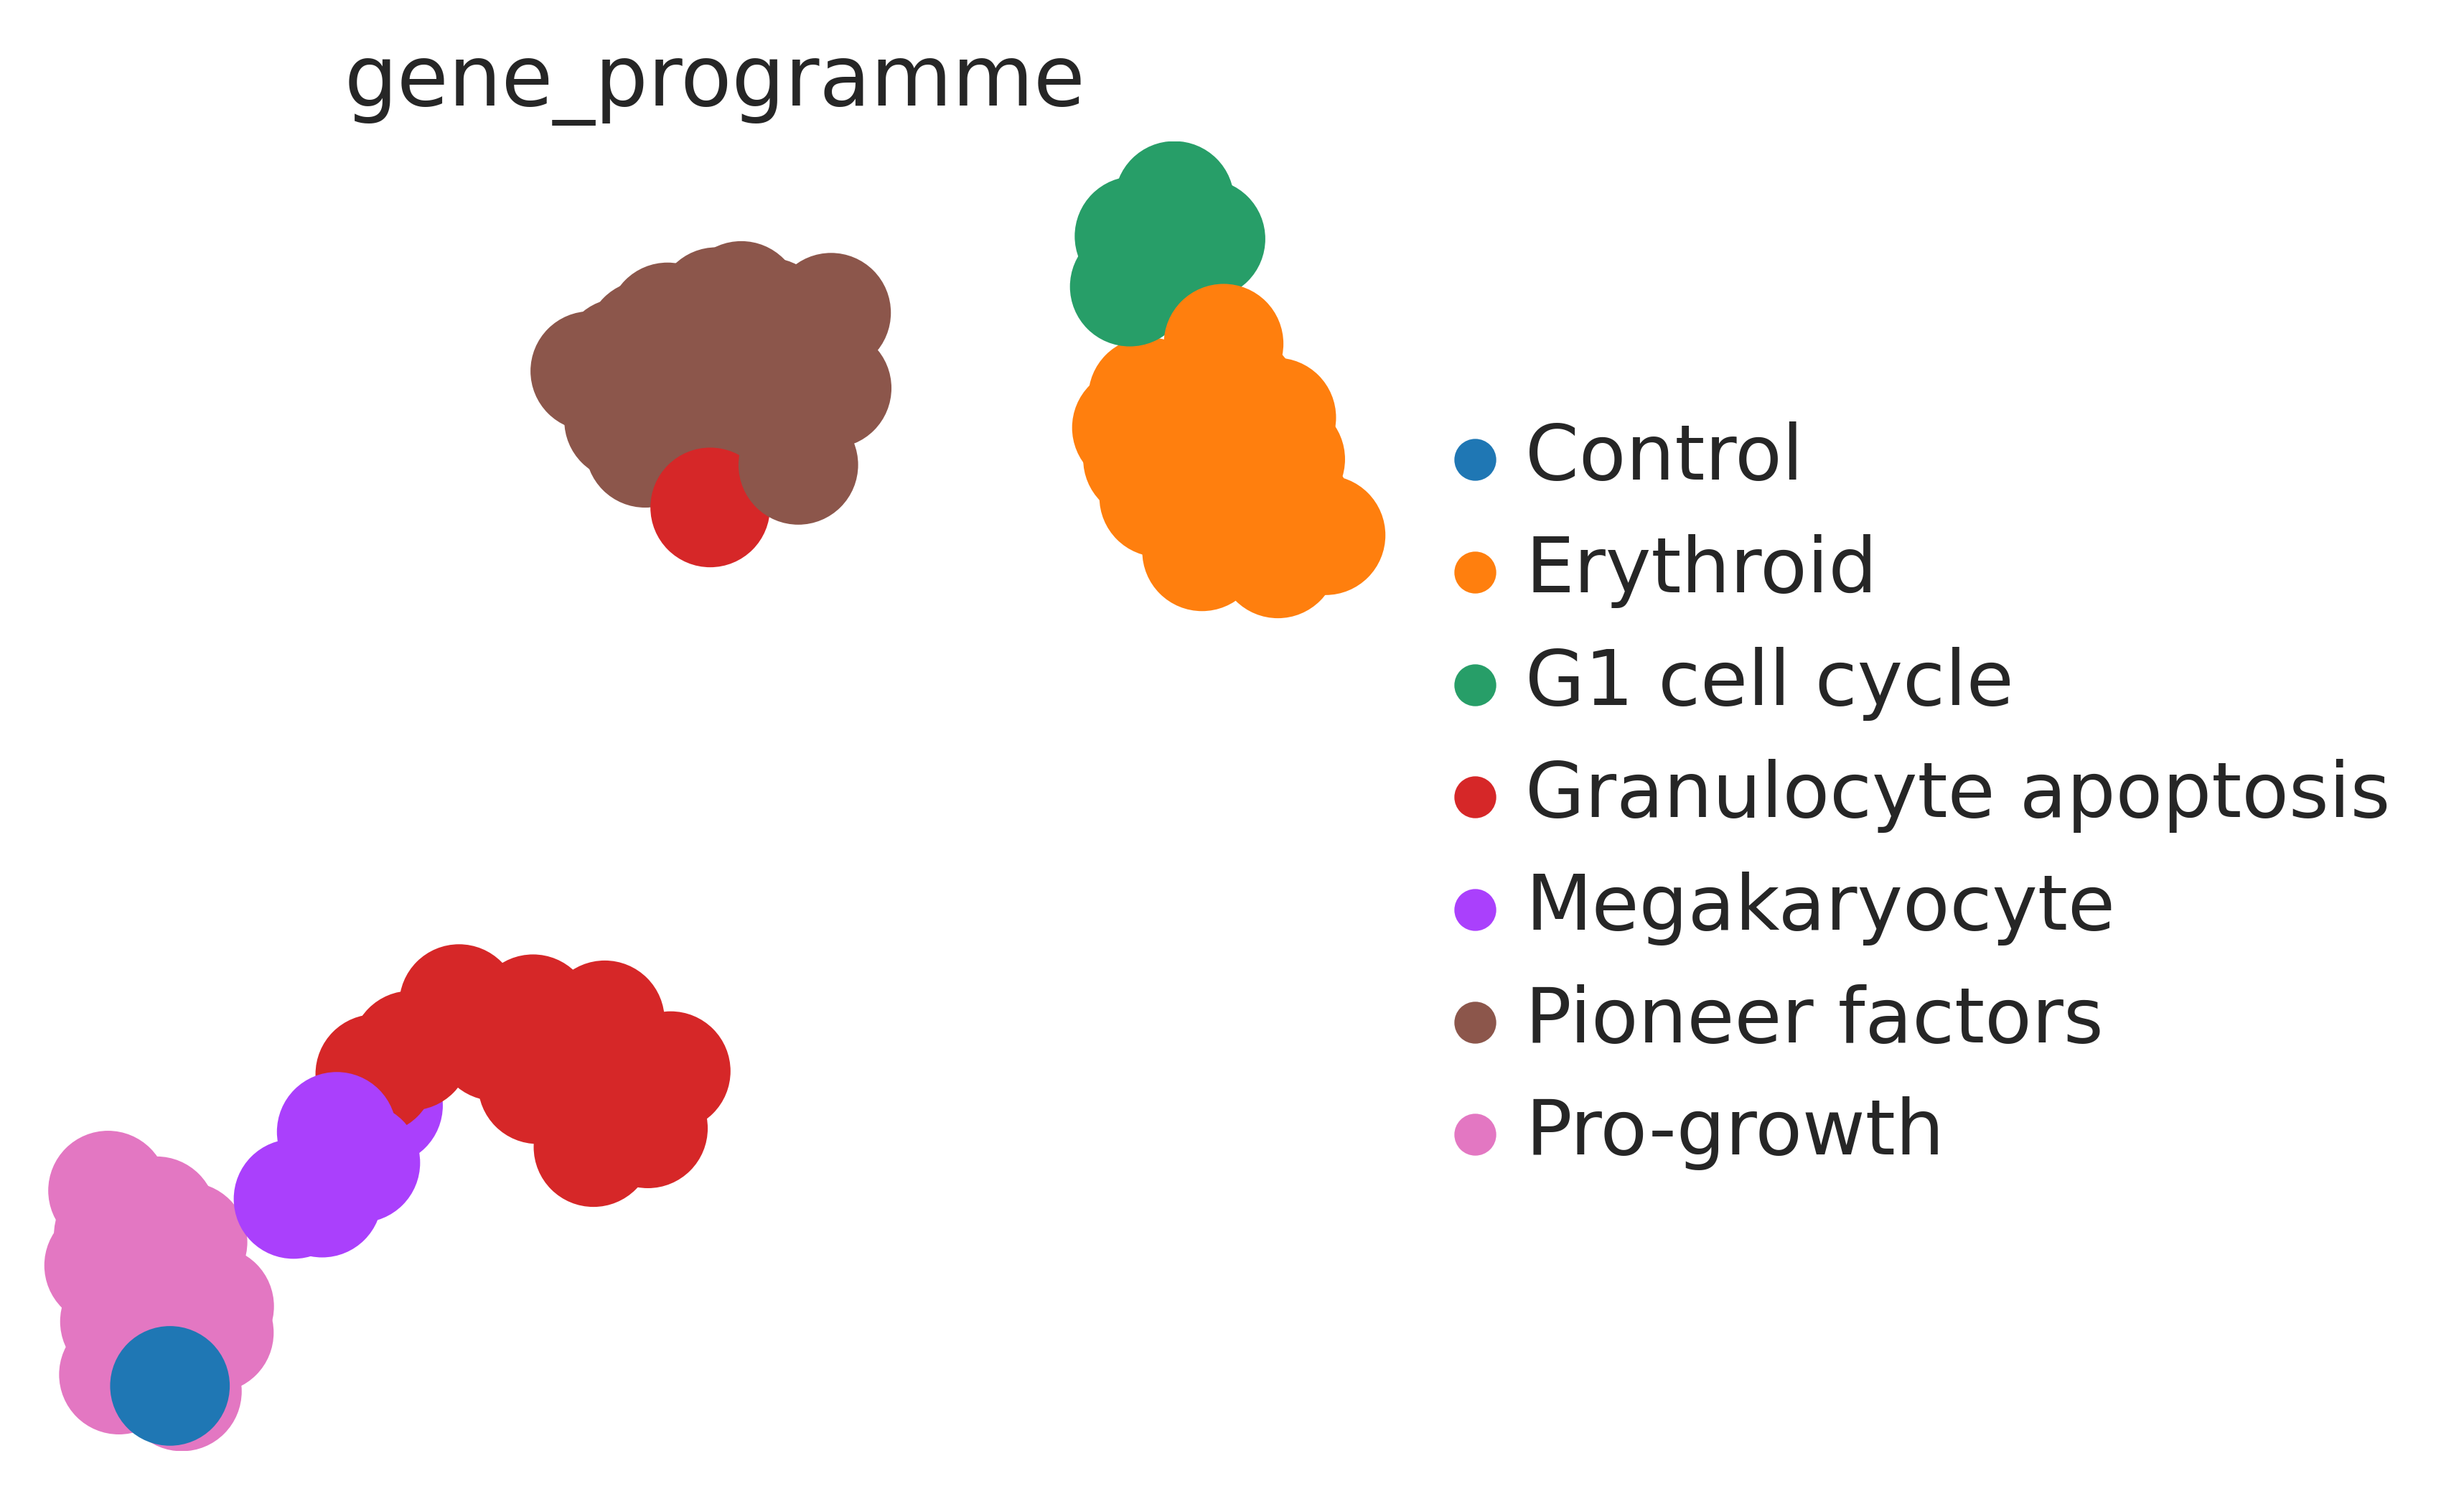

In [13]:
sc.pl.umap(psadata, color="gene_programme", show=False)
plt.savefig("figures/pseudobulk_gene_programme_umap.png", bbox_inches="tight")

## Discriminator Classifier

In [14]:
ps = pt.tl.DiscriminatorClassifierSpace()

In [15]:
classifier_ps = ps.load(
    adata_mixscape_cleaned,
    target_col="perturbation_name",
    hidden_dim=[512, 256],
    dropout=0.05,
    batch_size=64,
    batch_norm=True,
)

In [16]:
classifier_ps.train(max_epochs=2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
0 | net  | MLP  | 2.2 M 
------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.803     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     2.243701696395874     │
└───────────────────────────┴───────────────────────────┘

In [17]:
pert_embeddings = classifier_ps.get_embeddings()

In [18]:
ps = pt.tl.PseudobulkSpace()
psadata = ps.compute(
    pert_embeddings,
    target_col="perturbations",
    groups_col="perturbations",
    mode="mean",
    min_cells=0,
    min_counts=0,
)

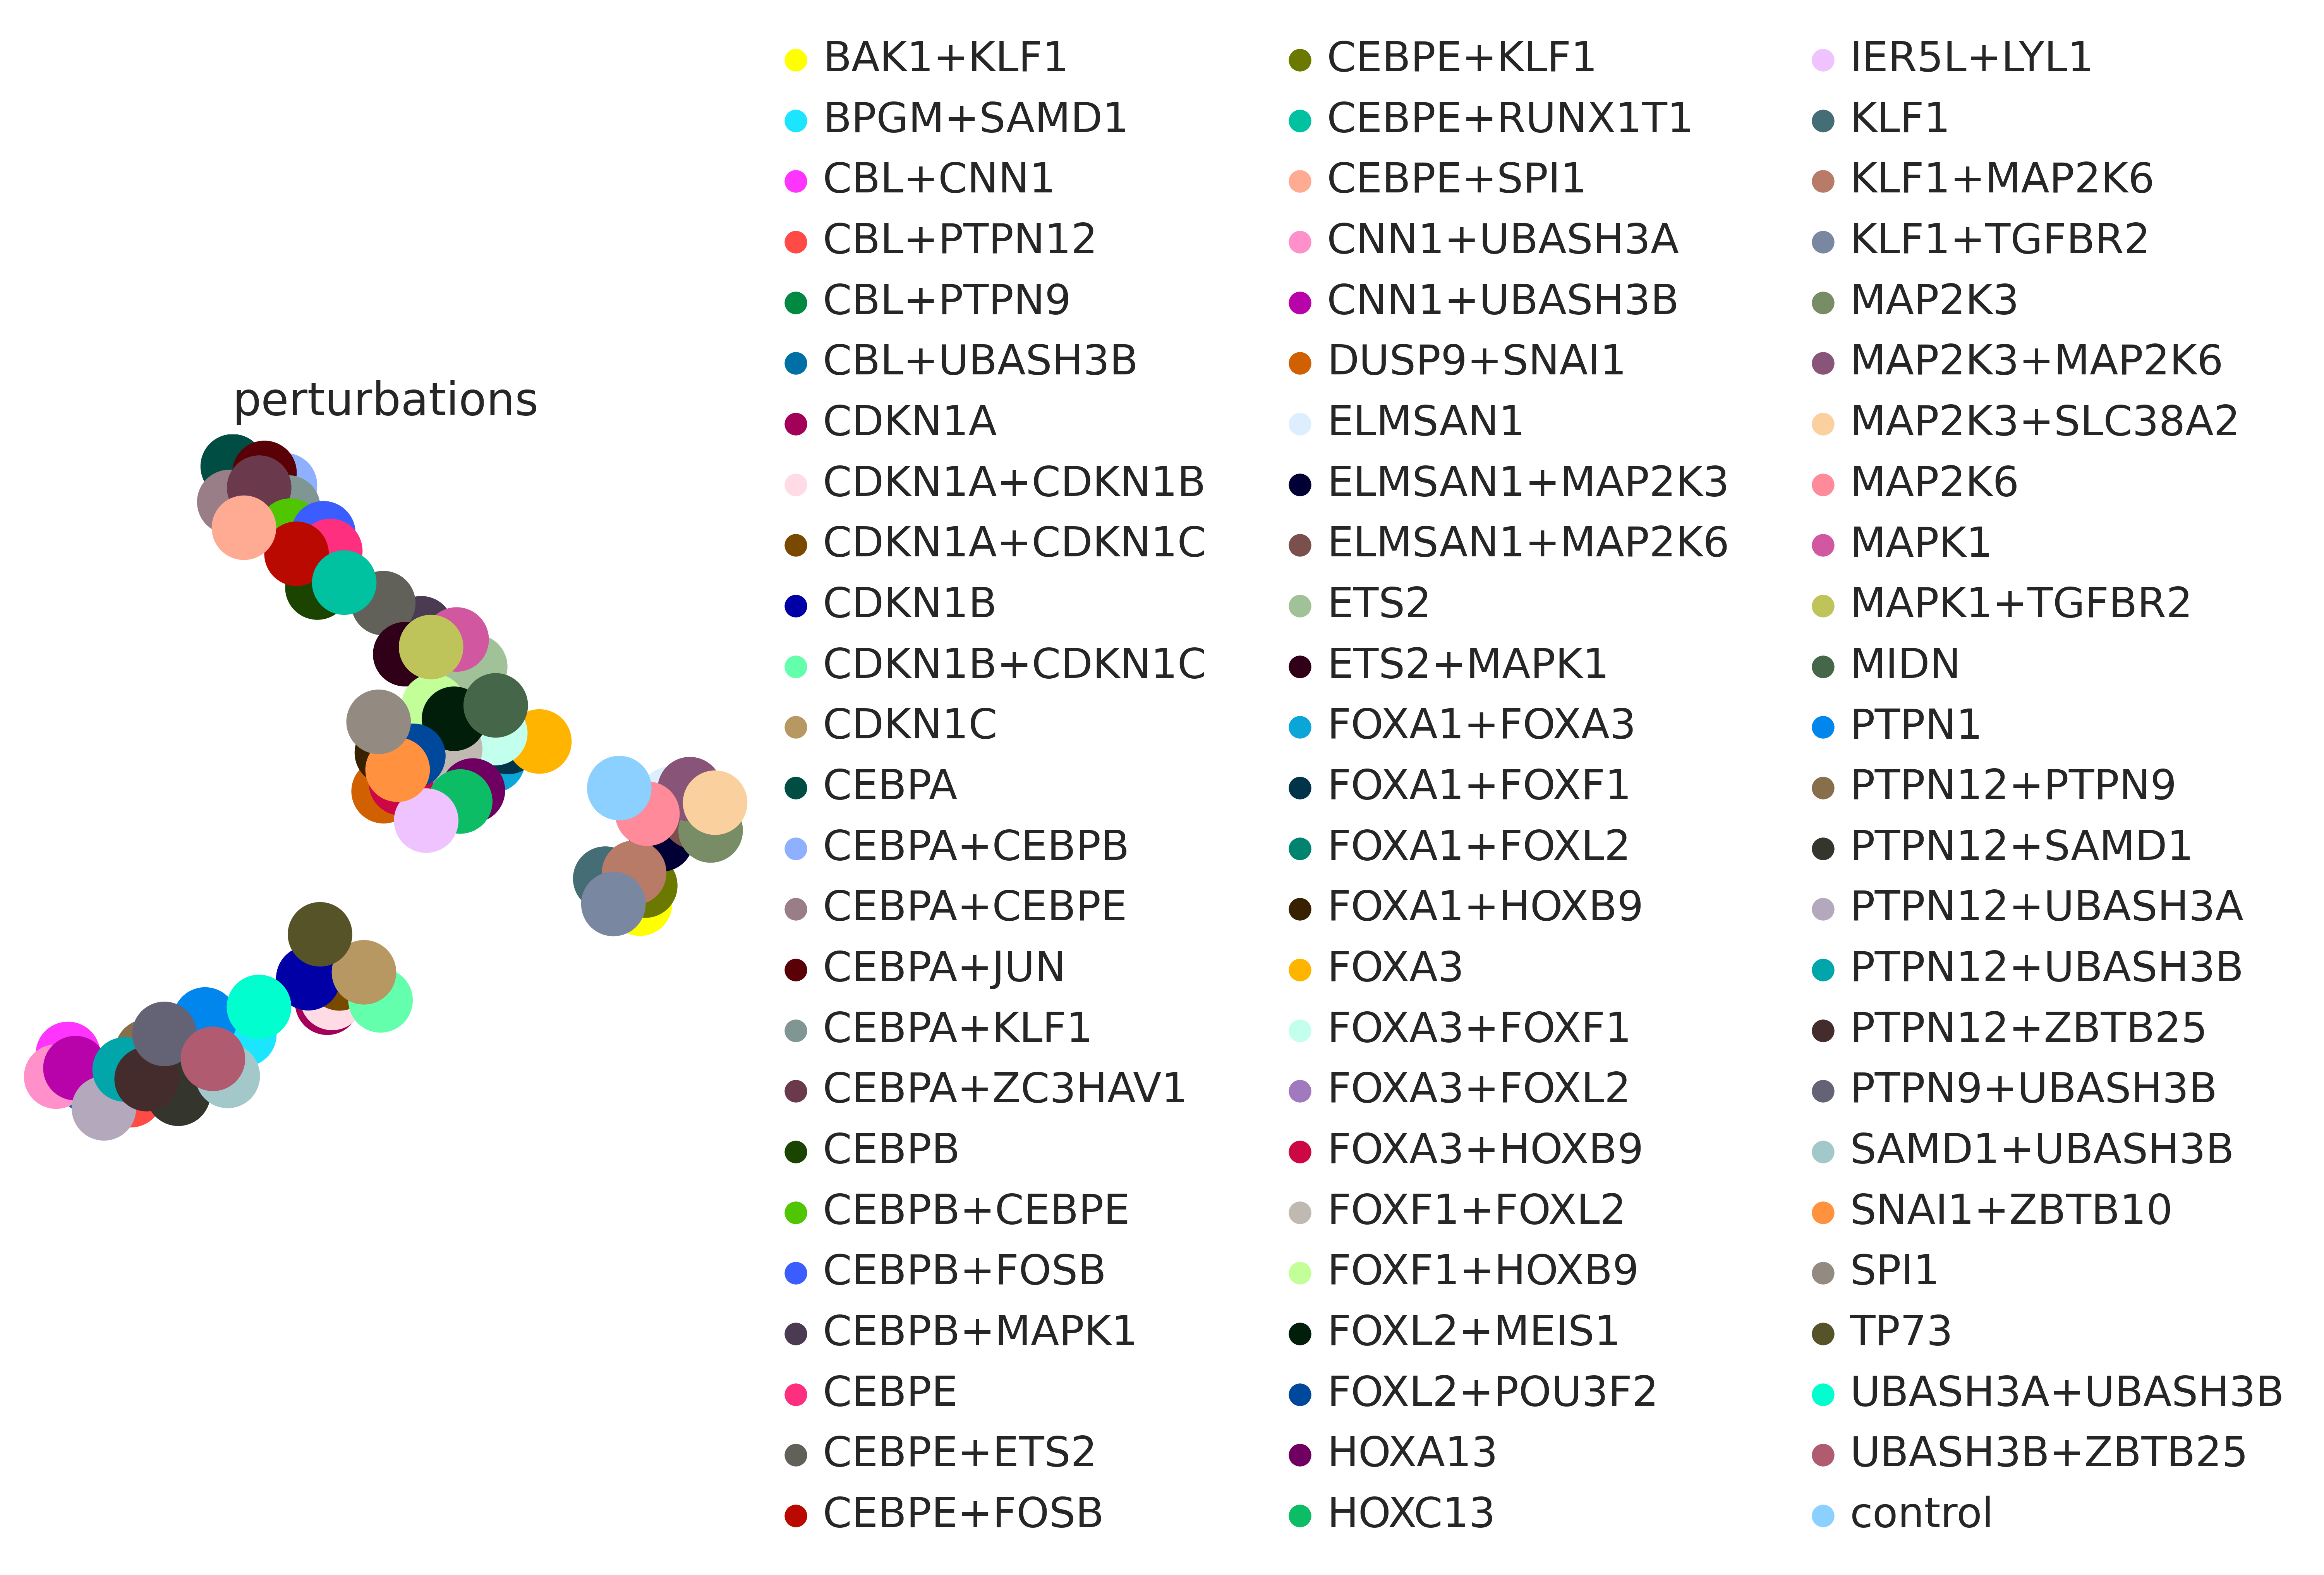

In [19]:
sc.pp.neighbors(psadata, use_rep="X")
sc.tl.umap(psadata)
sc.pl.umap(psadata, color="perturbations", show=False)
plt.savefig("figures/discriminator_perturbation_name_umap.png", bbox_inches="tight")

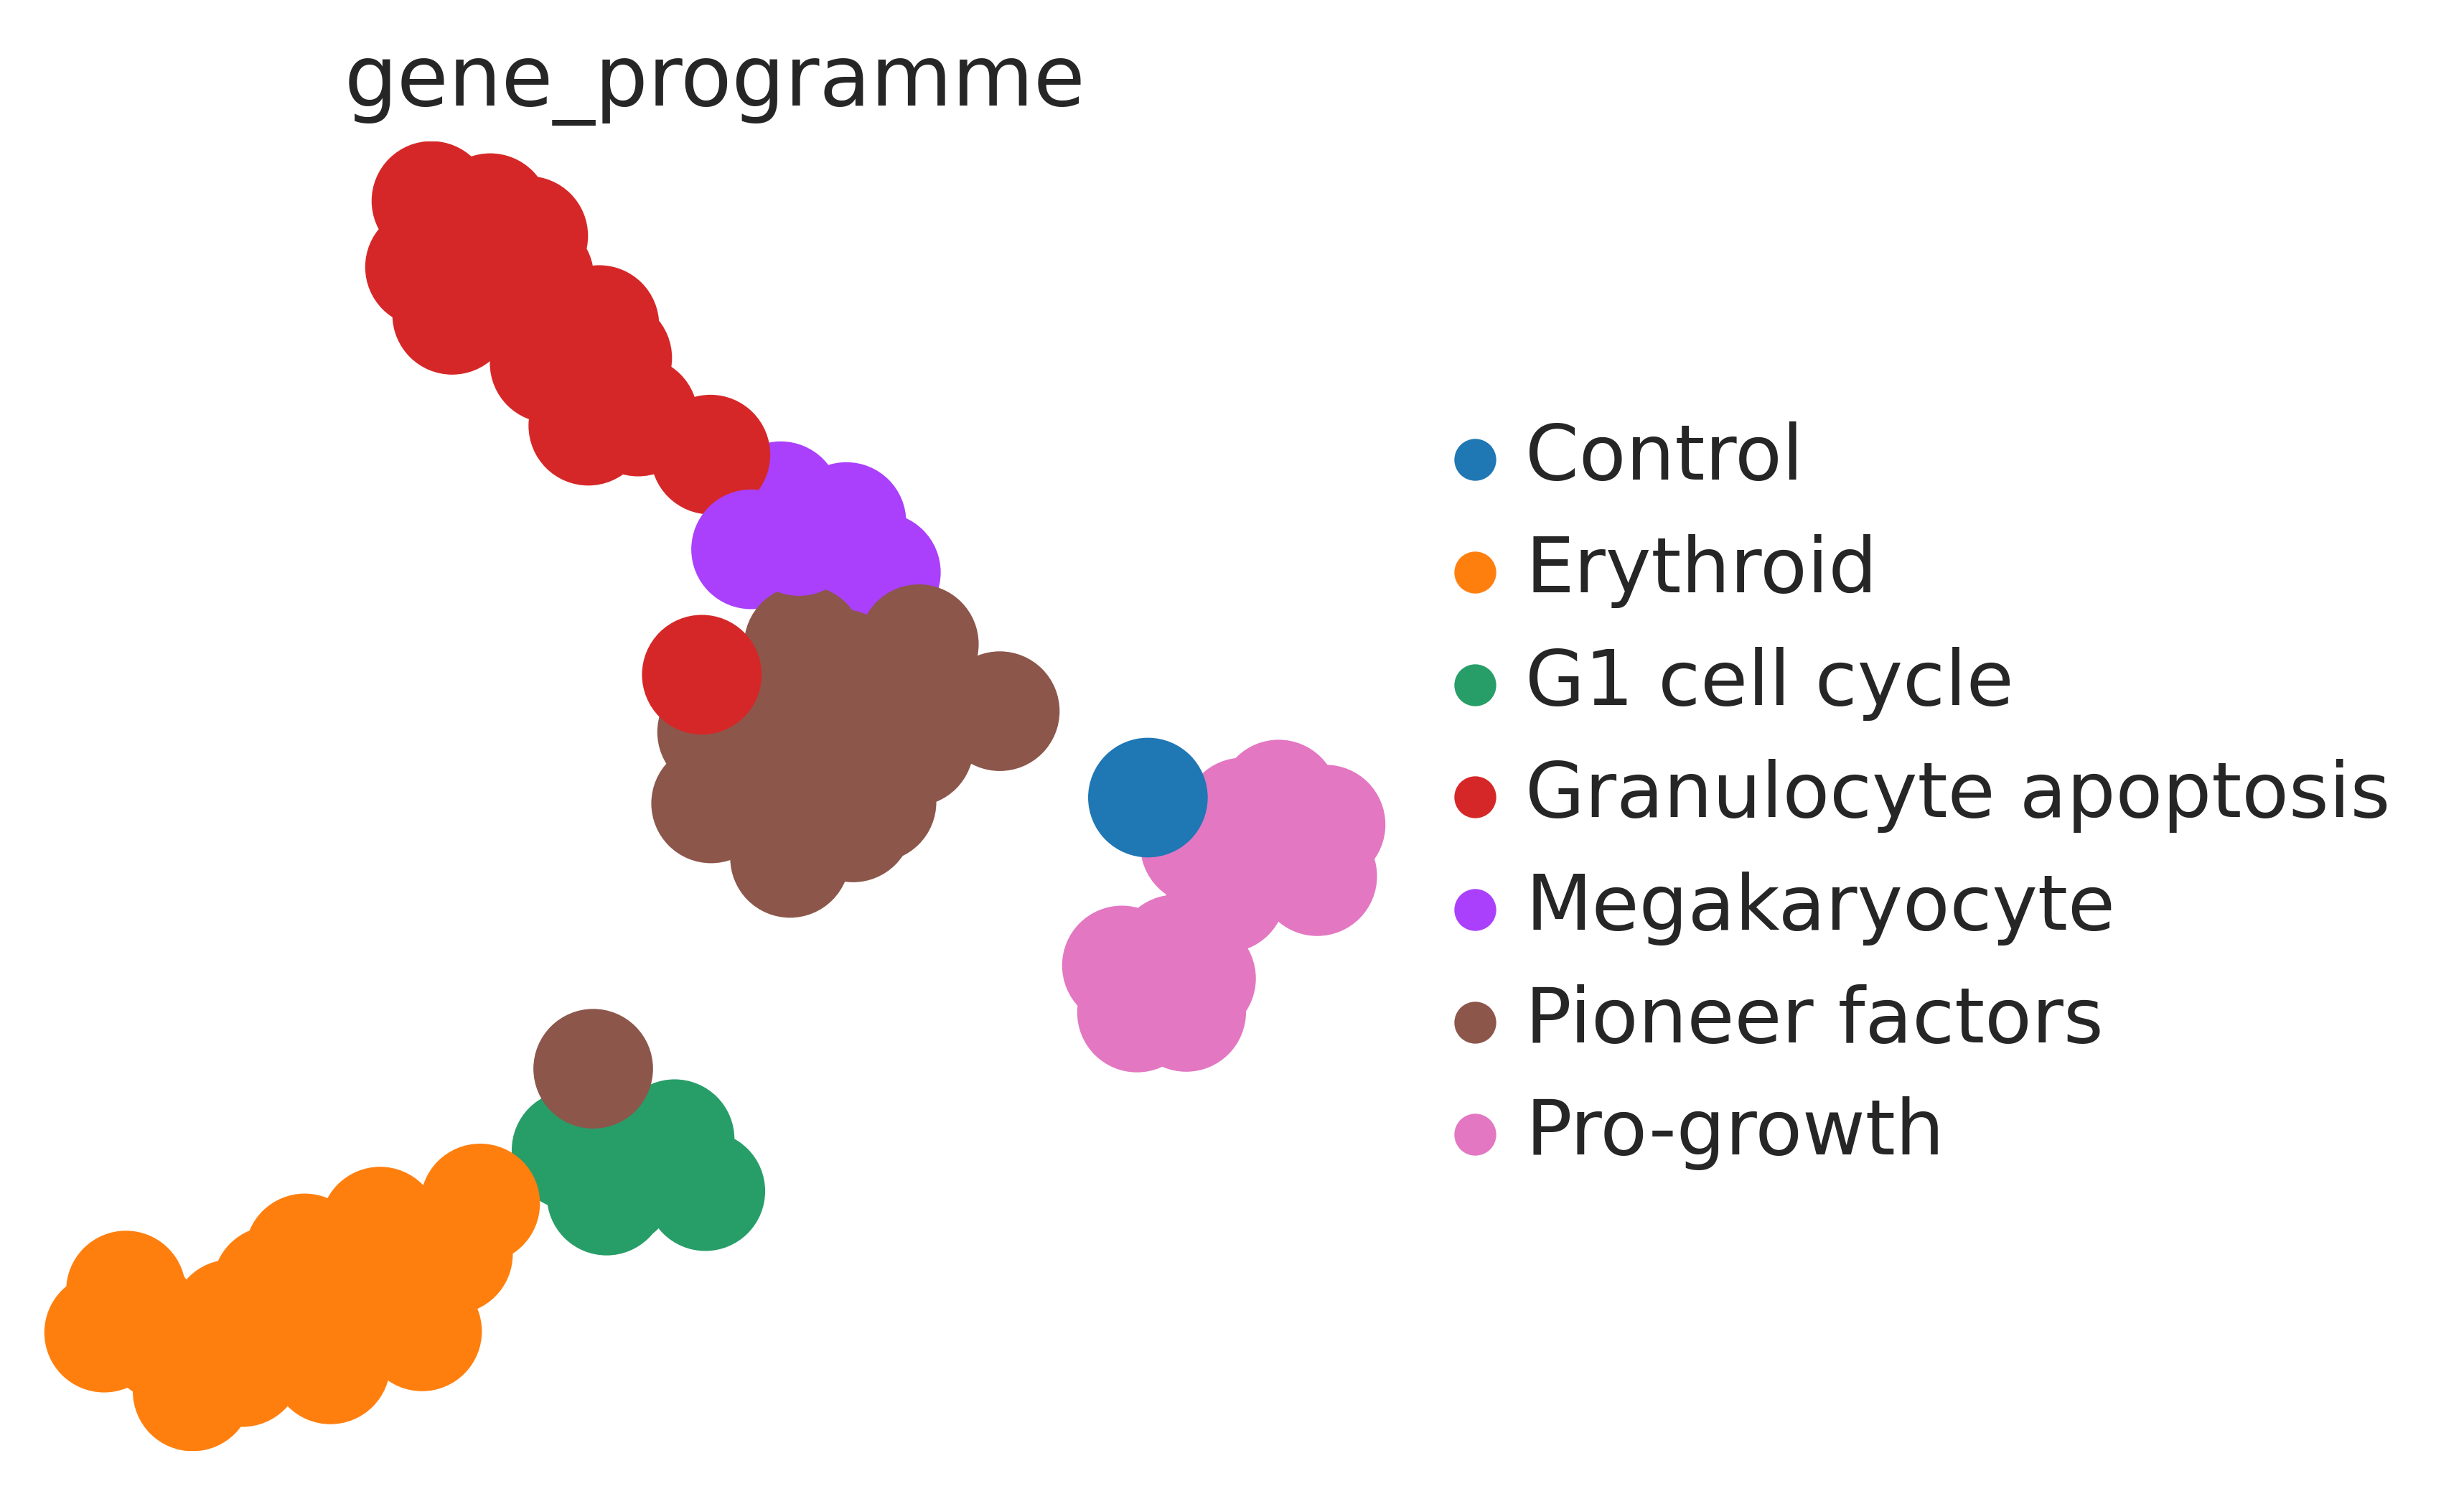

In [20]:
sc.pl.umap(psadata, color="gene_programme", show=False)
plt.savefig("figures/discriminator_gene_programme.png", bbox_inches="tight")

The perturbation initially annotated with 'granulocyte apoptosis' is 'SPI1'.

SPI1 is known as a pioneering factor [Ungerbäck 2018](https://genome.cshlp.org/content/28/10/1508) and henceforth the mislabeling here can be corrected.